<a href="https://colab.research.google.com/github/jjcrofts77/TMB-MATH34041/blob/main/content/notebooks/Chapter0/PythonNetworkExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.4 Python Network Example

In this section we run through a network analysis similar to what you are expected to do in your coursework, although this example is shorter and less developed than yours will be!

We shall consider the connectome of the *C. elegans* worm which is a tiny round worm and the only organism to date to have its entire nervous system mapped.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # statistical data visualisation package
from sklearn.metrics.pairwise import pairwise_distances # machine learning package

# load C. elegans data
labels = pd.read_csv("celegans277labels.csv", header=None)
A = pd.read_csv("celegans277matrix.csv", header=None)
positions = pd.read_csv("celegans277positions.csv", header=None)

# add labels
A.index = labels[0]
A.columns = labels[0]
positions.index = labels[0]

Let's plot the *C. elegans* network including spatial locations.

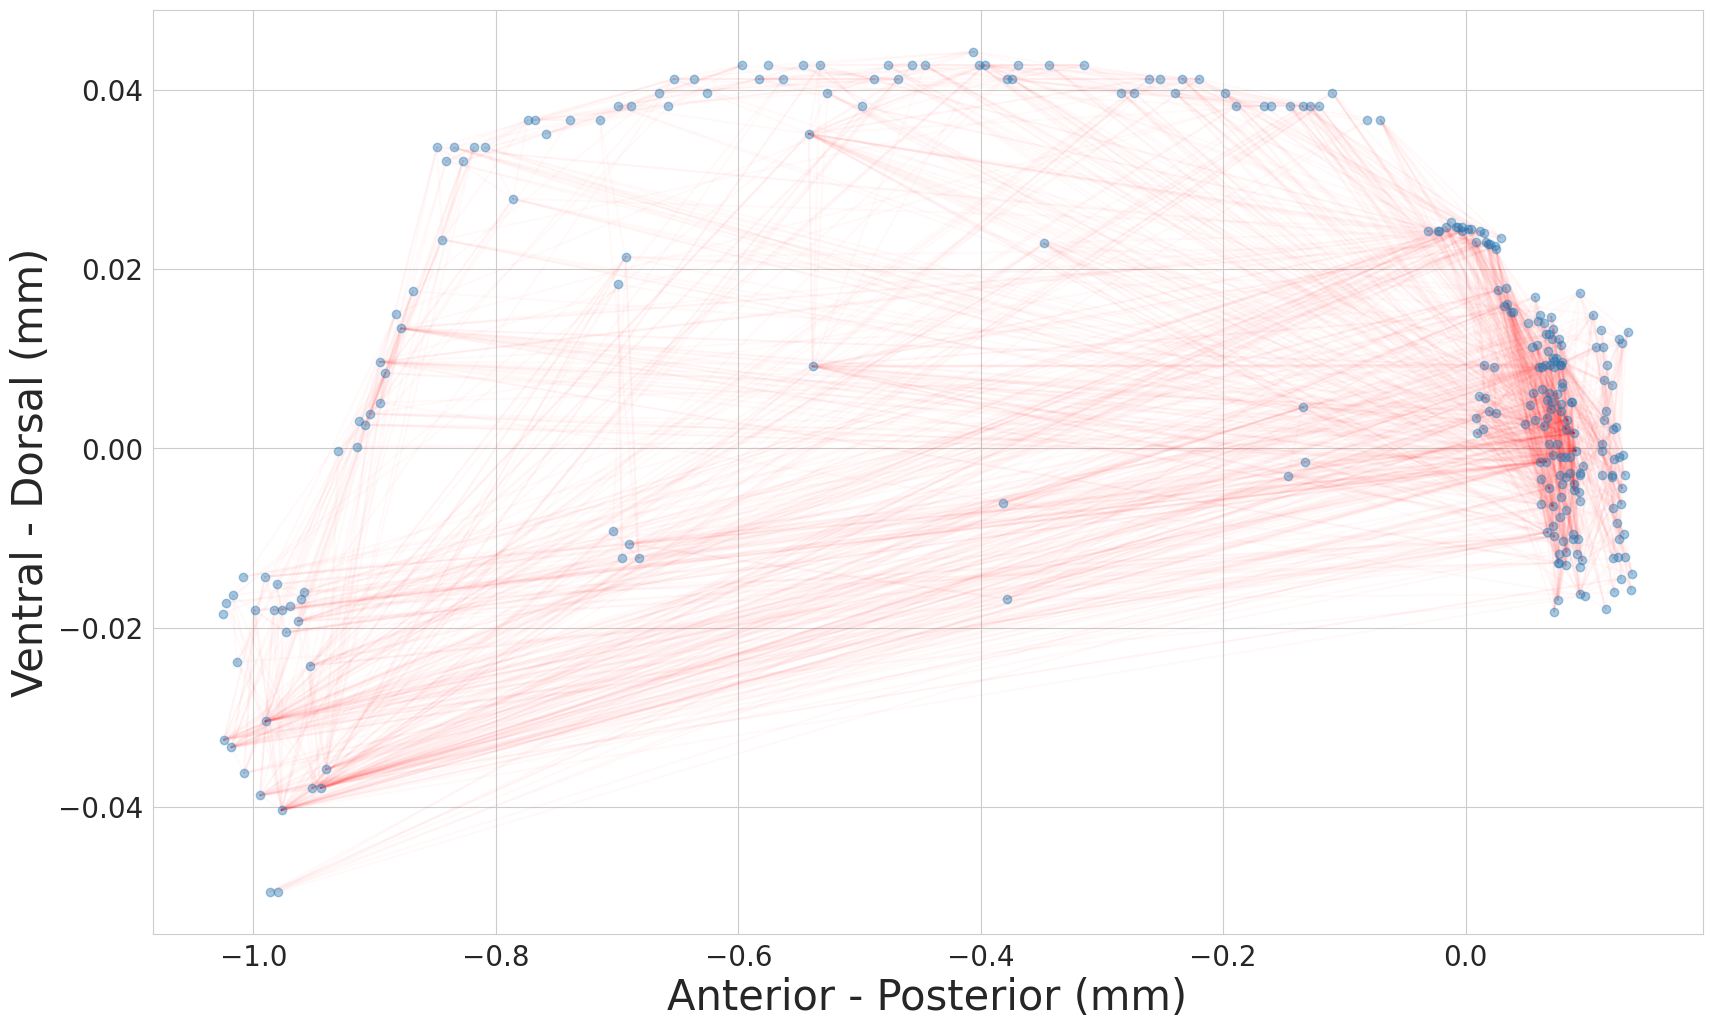

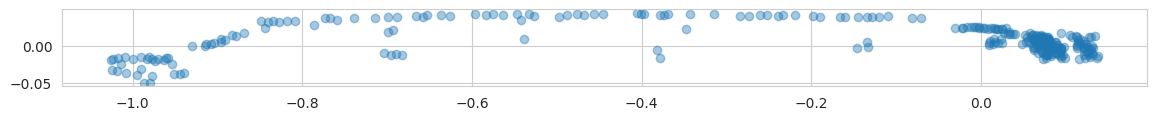

In [135]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,12))

# plot edges
for i,row in enumerate(A.values):
  for j, columns in enumerate(row):
    if columns == 1:
      x = [positions.values[i,0],positions.values[j,0]]
      y = [positions.values[i,1],positions.values[j,1]]
      plt.plot(x,y,color="red",alpha=0.025)

# plot nodes and add labels
plt.plot(positions.values[:,0],positions.values[:,1],"o",alpha=0.4); #positions.values removes the labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Anterior - Posterior (mm)",fontsize=30)
plt.ylabel("Ventral - Dorsal (mm)",fontsize=30)

plt.figure(figsize=(14,1))
plt.plot(positions.values[:,0],positions.values[:,1],"o",alpha=0.4);

Next we plot the adjacency matrix.

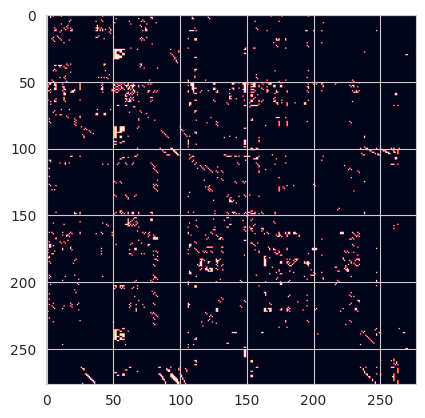

In [94]:
plt.imshow(A);

What about the in- and out-degrees of the network?

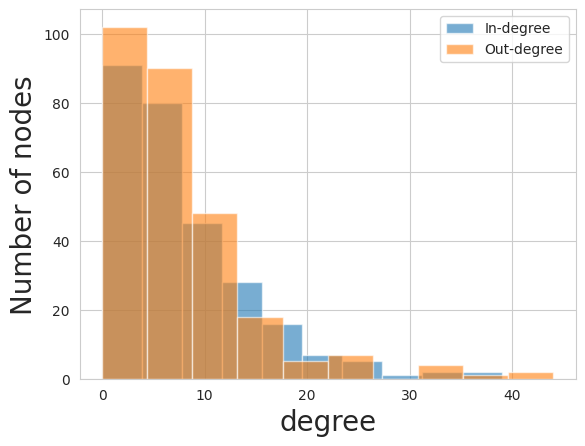

In [95]:
# in- and out-dgrees
in_degree = A.sum(axis=0)
out_degree = A.sum(axis=1)

# histograms of the in and out degrees
plt.hist(in_degree, alpha=0.6) #blue
plt.hist(out_degree, alpha=0.6); #orange
plt.xlabel('degree',fontsize=20), plt.ylabel('Number of nodes',fontsize=20)
plt.legend(['In-degree', 'Out-degree']);

Let's compute the clustering coefficient for our network and then plot the network with node size proportional to the clustering.

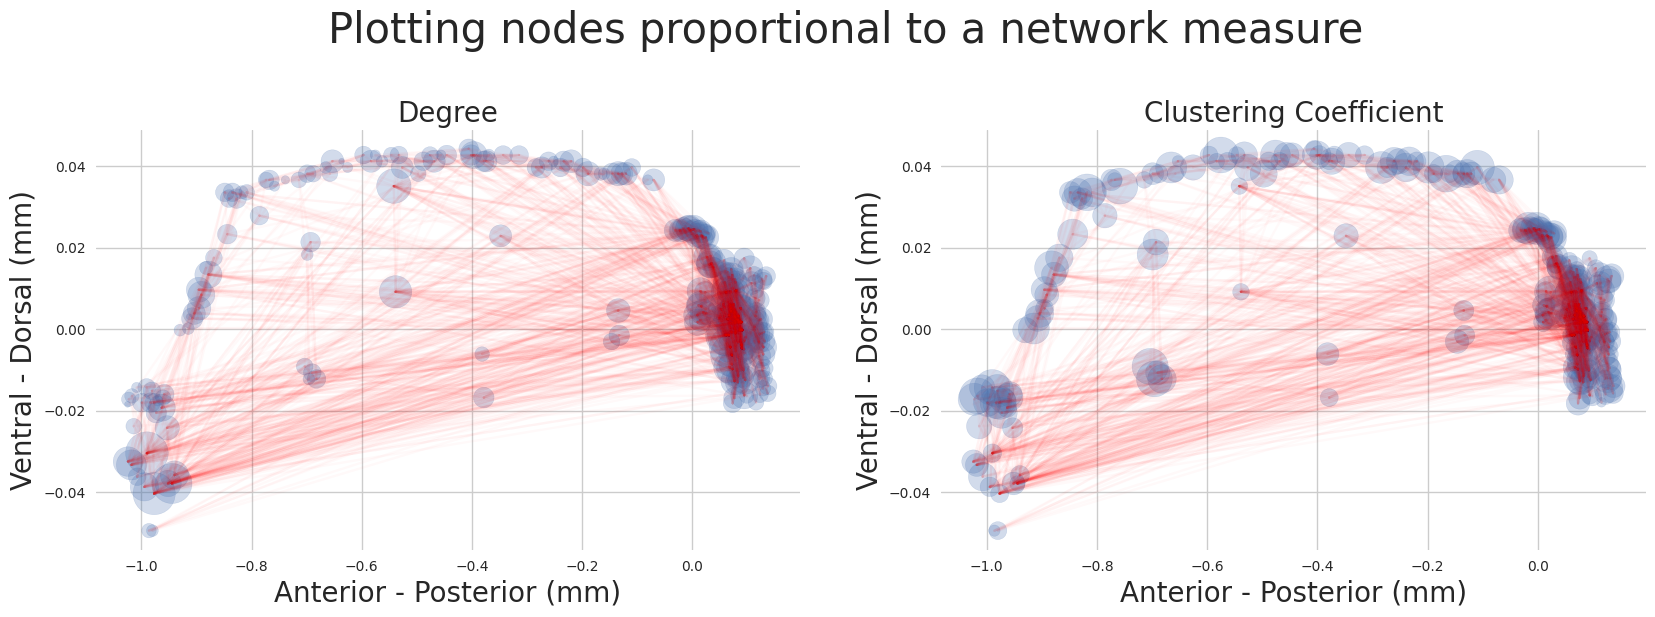

In [176]:
import networkx as nx

# Compute the clustering coefficient and degree
G = nx.from_numpy_array(A.values)
C = nx.clustering(G)
D = nx.degree_centrality(G)
deg= np.array(list(D.items())) # convert from dict to numpy array
CC = np.array(list(C.items())) # convert from dict to numpy array

# set up 2 by 2 plot
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2,2,1) # deg plot
ax2 = fig.add_subplot(2,2,2) # clustering plot

# plot as before

# plot edges
for i,row in enumerate(A.values):
  for j, columns in enumerate(row):
    if columns == 1:
      x = [positions.values[i,0],positions.values[j,0]]
      y = [positions.values[i,1],positions.values[j,1]]
      ax1.plot(x,y,color="red",alpha=0.025)
      ax2.plot(x,y,color="red",alpha=0.025)

# plot nodes and add labels (deg)

fig.suptitle('Plotting nodes proportional to a network measure',size=30)

# degree
ax1.scatter(positions.values[:,0],positions.values[:,1],s=deg[:,1]*5000,alpha=0.25);
ax1.set_xlabel("Anterior - Posterior (mm)",fontsize=20)
ax1.set_ylabel("Ventral - Dorsal (mm)",fontsize=20);
ax1.set_title("Degree",fontsize=20)

# clustering coefficient
ax2.scatter(positions.values[:,0],positions.values[:,1],s=CC[:,1]*1000,alpha=0.25);
ax2.set_xlabel("Anterior - Posterior (mm)",fontsize=20)
ax2.set_ylabel("Ventral - Dorsal (mm)",fontsize=20)
ax2.set_title("Clustering Coefficient",fontsize=20);



Next let's look at how the distance matrix and the communicability matrix look like for the *C. elegans* network.

In [ ]:
# spy plots of distance and communicability

Is the *C. elegans* connectome a small-world network?